In [1]:
%matplotlib inline
import numpy as np
from bloom_filters import *
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
T = np.transpose


In [3]:
dIn=21 # 500
nIn=5000
m=350 # should this be 333
k=17
outHash,datHash,datIn = generate_hash_space(dIn=dIn,nIn=nIn,m=m,k=k)

In [4]:
dS,dHash,dIn = compute_random_distances(S=outHash,datHash = datHash,datIn=datIn)

In [5]:
s_len = 20 # sample length
n_pert = 18
laps = 10
degree = -0.5 # for objective function
pert_val = np.arange(n_pert)
pert_pos = np.arange(s_len)
n_ex = np.shape(outHash)[0]

out_TB = np.zeros((n_pert,s_len)) # Timing
out_SB = np.zeros((n_pert,s_len)) # Stable
out_B  = np.zeros((n_pert,s_len)) # Standard Bloom
out_FB = np.zeros((n_pert,s_len)) # Fly Bloom
out_EC = np.zeros((n_pert,s_len)) # Exact Cylinder
out_ECC = np.zeros((n_pert,s_len)) # Exact Cone
out_OF = np.zeros((n_pert,s_len)) # Objective FCN
full_TB = np.zeros((n_pert,s_len,k)) # Objective FCN
for i,p in enumerate(pert_val):
    for j,pp in enumerate(pert_pos):
        hTB = np.zeros(laps)
        hSB = np.zeros(laps)
        hB  = np.zeros(laps)
        hFB = np.zeros(laps)
        #hEC = np.zeros(laps)
        #hECC = np.zeros(laps)
        hOF = np.zeros(laps)
        for lap in range(laps):
            ind0 = np.random.choice(n_ex-s_len-1)
            S = outHash[ind0:ind0+s_len].copy() # must copy to prevent changes to outHash
            q = outHash[ind0+s_len+1].copy()
            q_ = perterb_hash(q,p)
            S[pp] = q_
            if lap==0:
                hEC = exact_cylinder(S,q,time=20,space=5) # 
                hECC = exact_cone(S,q,space=10)
                full_TB[i,j,:] = timing_bloom(S,O=10,q=q,full_return=True)
            
            hTB[lap] = np.sum(timing_bloom(S,O=10,q=q)) 
            hSB[lap] = np.sum(stable_bloom(S,O=10,Om=20,q=q))
            hB[lap]  = np.sum(standard_bloom(S=S,q=q))
            hFB[lap] = fly_bloom(S=S,q=q,rr=.05)
            hOF[lap] = objective_fcn(S=S,q=q,deg = degree)
            #hEC[lap] = exact_cylinder(S,q,time=20,space=5)
            #hECC[lap] = exact_cone(S,q,space=10)
        out_TB[i,j] = np.mean(hTB)
        out_SB[i,j] = np.mean(hSB)
        out_B[i,j]  = np.mean(hB)
        out_FB[i,j] = np.mean(hFB)
        out_EC[i,j] = np.mean(hEC)
        out_ECC[i,j] = np.mean(hECC)
        out_OF[i,j] = np.mean(hOF)
        
    

/netapp/iblsn/home/tsheehan/py_code/bloom_filters.py:96: RuntimeWarning: invalid value encountered in greater
  this_query[this_query>T_] -= O # wrap around values


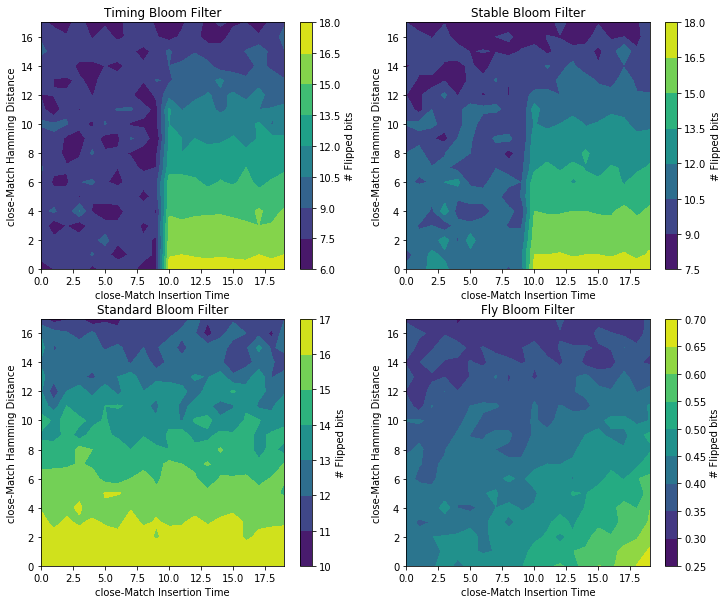

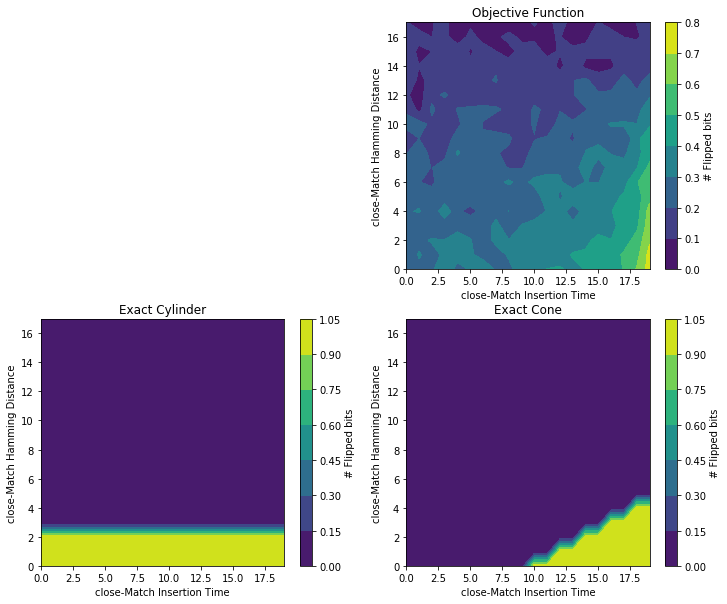

In [6]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
# plt.imshow(out_TB,origin='lower')
plt.contourf(out_TB)
plt.title('Timing Bloom Filter')
plt.xlabel('close-Match Insertion Time')
plt.ylabel('close-Match Hamming Distance')
cb = plt.colorbar()
cb.set_label('# Flipped bits')


plt.subplot(2,2,2)
# plt.imshow(out_SB,origin='lower')
plt.contourf(out_SB)
plt.title('Stable Bloom Filter')
plt.xlabel('close-Match Insertion Time')
plt.ylabel('close-Match Hamming Distance')
cb = plt.colorbar()
cb.set_label('# Flipped bits')


plt.subplot(2,2,3)
# plt.imshow(out_B,origin='lower')
plt.contourf(out_B)
plt.title('Standard Bloom Filter')
plt.xlabel('close-Match Insertion Time')
plt.ylabel('close-Match Hamming Distance')
cb = plt.colorbar()
cb.set_label('# Flipped bits')

plt.subplot(2,2,4)
# plt.imshow(1-out_FB,origin='lower')
plt.contourf(1-out_FB)
plt.title('Fly Bloom Filter')
plt.xlabel('close-Match Insertion Time')
plt.ylabel('close-Match Hamming Distance')
cb = plt.colorbar()
cb.set_label('# Flipped bits')
plt.show()

plt.figure(figsize=(12,10))
plt.subplot(2,2,3)
plt.contourf(out_EC)
plt.title('Exact Cylinder')
plt.xlabel('close-Match Insertion Time')
plt.ylabel('close-Match Hamming Distance')
cb = plt.colorbar()
cb.set_label('# Flipped bits')

plt.subplot(2,2,4)
plt.contourf(out_ECC)
plt.title('Exact Cone')
plt.xlabel('close-Match Insertion Time')
plt.ylabel('close-Match Hamming Distance')
cb = plt.colorbar()
cb.set_label('# Flipped bits')

plt.subplot(2,2,2)
plt.contourf(np.log(1-out_OF))
plt.title('Objective Function')
plt.xlabel('close-Match Insertion Time')
plt.ylabel('close-Match Hamming Distance')
cb = plt.colorbar()
cb.set_label('# Flipped bits')
plt.show()

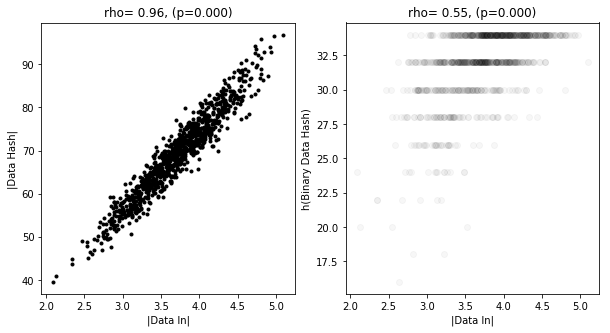

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(dIn,dHash,'k.')
plt.title('rho= %.2f, (p=%.3f)' %pearsonr(dHash,dIn))
plt.xlabel('|Data In|')
plt.ylabel('|Data Hash|')
plt.subplot(122)
plt.plot(dIn,dS,'ko',alpha=.03)
plt.xlabel('|Data In|')
plt.ylabel('h(Binary Data Hash)')
plt.title('rho= %.2f, (p=%.3f)' %pearsonr(dS,dIn))
plt.show()

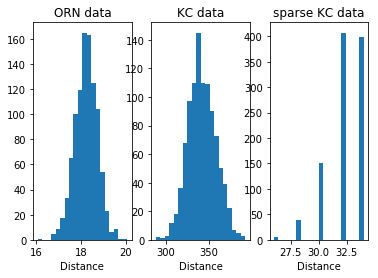

In [7]:
plt.subplot(1,3,1)
plt.title('ORN data')
plt.hist(dIn,20)
plt.xlabel('Distance')

plt.subplot(1,3,2)
plt.title('KC data')
plt.hist(dHash,20)
plt.xlabel('Distance')

plt.subplot(1,3,3)
plt.title('sparse KC data')
plt.hist(dS,20)
plt.xlabel('Distance')
plt.show()

In [28]:
s_len
space = 5
d_allow = np.concatenate((np.zeros(s_len-space-1),np.arange(0,space+1)))


20

In [20]:
x = full_TB[5,17,:]
x

array([ 3.,  3.,  3.,  3.,  3.,  3.,  6., nan, nan,  2.,  3.,  3.,  3.,
        1., nan,  3.,  3.])

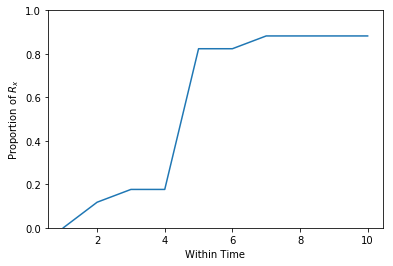

In [88]:
foo = np.sort(full_TB)
# bar = np.cumsum(foo,axis=2)
bin_view= np.arange(1,11)
bins = np.arange(0.5,11.5,1)
ind_view = [8,16]

# good = ~np.isnan(foo[ind_view[0],ind_view[1],:])
# foobar,_ = np.histogram(foo[ind_view[0],ind_view[1],good],bins)
# plt.plot(bin_view,np.cumsum(foobar)/k)
plt.plot(bin_view,quick_roc(full_TB[5,15,:]))
plt.ylim([0,1.0])
plt.xlabel('Within Time')
plt.ylabel('Proportion of $R_x$')
plt.show()


In [86]:
def quick_roc(x):
    vals,_ = np.histogram(x[~np.isnan(x)],bins)
    return np.cumsum(vals)/k

In [92]:
roc_curves = np.zeros((n_pert,s_len,10))
for i in range(n_pert):
    for j in range(s_len):
        roc_curves[i,j,:] = quick_roc(full_TB[i,j,:])

In [142]:
foo = np.arange(1,10,.55)
len(foo)

17

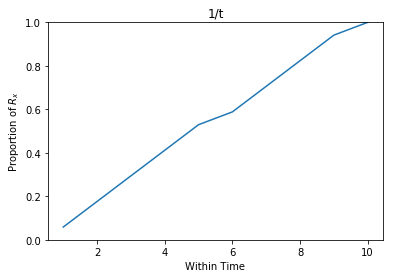

In [144]:
chg = 5
t = 6
# plt.plot(bin_view,T(roc_curves[chg,20-t,:])) # 18, 20, 10
plt.plot(bin_view,quick_roc(foo)) # 18, 20, 10
plt.ylim([0,1.0])
plt.xlabel('Within Time')
plt.ylabel('Proportion of $R_x$')
# plt.title('%i bits %i time points ago' %(chg,t))
plt.title('1/t')
plt.show()

Text(0,0.5,'Optimal k')

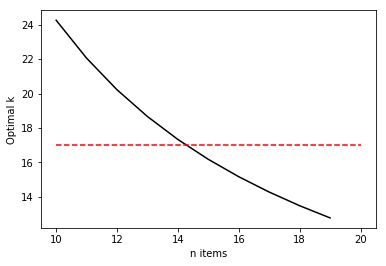

In [2]:
# OPTIMAL k | m,n
n= np.arange(10,20)
m = 350
k = np.log(2)*m/n
plt.plot(n,k,'k')
plt.plot([10,20],[17,17],'r--')
plt.xlabel('n items')
plt.ylabel('Optimal k')

In [20]:
# n possible edges given n nodes
n_edges_nodes = lambda n: np.sum(np.arange(1,n)) 
n_nodes = np.arange(2,100)
n_edges = [n_edges_nodes(x) for x in n_nodes]

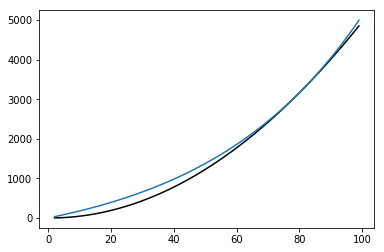

In [45]:
plt.plot(n_nodes,n_edges,'k')
plt.plot(n_nodes,np.exp(n_nodes/50)*800-800)
plt.show()

In [58]:
# m_want 
epsilon = .01
# epsilon = .000006
n = 14
m_want = n * np.log2(np.e) * np.log2(1/epsilon)
print(m_want)

134.19081728314413


In [55]:
# FP RATE FLY
m = 350
k = 17
n =14
p = np.exp(-k*n/m)
fp = (1-p)**k
print(fp)

6.083187425294931e-06


In [59]:
# k want
m = 135
n = 14
k = np.log(2)*m/n
print(k)

6.683919241113758


In [60]:
27**2

729